In [13]:
cd /mnt/c/Users/wjdgu/OneDrive/바탕 화면/Euron-5th-Mid-DL

/mnt/c/Users/wjdgu/OneDrive/바탕 화면/Euron-5th-Mid-DL


In [5]:
pwd

'/Users/jhyuny/Desktop/Euron-5th-Mid-DL'

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

print(os.listdir("/Users/jhyuny/Desktop/Euron-5th-Mid-DL/input"))

['test.csv', 'train.csv', 'sample_submission.csv']


## Basics of Pytorch
Matrices
- In pytorch, matrix(array) is called tensors.
- 3*3 matrix koy. This is 3x3 tensor

In [10]:
# numpy array
array = [[1,2,3],[4,5,6]]
first_array = np.array(array)

print(type(first_array)) # type
print(np.shape(first_array)) # shape
print(first_array)

<class 'numpy.ndarray'>
(2, 3)
[[1 2 3]
 [4 5 6]]


- Now examine how we implement tensor
- we create tensor with torch.Tensor() method

In [14]:
import torch

# pytorch array
tensor = torch.Tensor(array) # array는 바로 위 block에서 정의된 배열, array -> torch
print(tensor.type)
print(tensor.shape)
print(tensor)

<built-in method type of Tensor object at 0x13fc31ea0>
torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


Allocation is one of the most used technique in coding. Therefore lets learn how to make it with pytorch

In [15]:
print(np.ones((2,3))) # numpy

print(torch.ones((2,3))) # torch

[[1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [16]:
print(np.random.rand(2,3)) # numpy

print(torch.rand(2,3)) # torch

[[0.81304728 0.87128936 0.44568402]
 [0.34456956 0.638683   0.06017294]]
tensor([[6.6373e-01, 1.4436e-04, 5.8460e-01],
        [3.1168e-01, 1.3204e-02, 1.2830e-01]])


Usually convert result of neural network that is tensor to numpy array to visualize or examine

In [17]:
# random numpy array
array = np.random.rand(2,2)
print(type(array))

# from numpy to tensor
fnumpy_ttensor = torch.from_numpy(array)
print(fnumpy_ttensor)

# from tensro to numpy
tensor = fnumpy_ttensor
ftensor_tnumpy = tensor.numpy()
print(ftensor_tnumpy)
print(type(ftensor_tnumpy))


<class 'numpy.ndarray'>
tensor([[0.5701, 0.3431],
        [0.6062, 0.1730]], dtype=torch.float64)
[[0.57014036 0.34312449]
 [0.60623675 0.1729961 ]]
<class 'numpy.ndarray'>


### Basic Math with Pytorch
- Resize: view()
- a and b are tensor.
- Addition: torch.add(a,b) = a + b
- Subtraction: a.sub(b) = a - b
- Element wise multiplication: torch.mul(a,b) = a * b
- Element wise division: torch.div(a,b) = a / b
- Mean: a.mean()
- Standart Deviation (std): a.std()

In [18]:
tensor = torch.ones(3,3)

print(tensor)

print(tensor.view(9).shape, tensor.view(9))

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([9]) tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])


In [19]:
print(torch.add(tensor,tensor))

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


In [20]:
print(tensor.sub(tensor)) # tensor에서 tensor 빼기

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [21]:
print(tensor) # tensor값 자체가 변하진 않음

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [22]:
print(torch.mul(tensor,tensor))

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [23]:
print(torch.div(tensor,tensor))

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [24]:
tensor=torch.Tensor([1,2,3,4,5])
print(tensor.mean())
print(tensor.std())

tensor(3.)
tensor(1.5811)


## Variables
We will use pytorch in neural network. Therefore we need to handle gradients.
- Deep learning tutorial : https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners
- Difference between variables and tensor is variable accumulates gradients.
- We can make math operations with variables, too.
- In order to make backward propagation we need variables

In [25]:
from torch.autograd import Variable
# requires_grad : pytorch tensor에 대한 gradient 계산 여부를 나타내는 속성
# 자동 미분을 지원하기 때문에 역전파를 수행하는 데 사용된다
var = Variable(torch.ones(3), requires_grad=True)
var

tensor([1., 1., 1.], requires_grad=True)

In [27]:
# lets make basic backward propagation
# y=x^2

array=[2,4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad = True)
y = x**2

print(y)

o = (1/2)*sum(y)

print(o)

o.backward() # calculates gradients
# variables accumulates gradients. 

# lets look at gradients with x.grad
print(x.grad)


tensor([ 4., 16.], grad_fn=<PowBackward0>)
tensor(10., grad_fn=<MulBackward0>)
tensor([2., 4.])


### Linear Regression
- Linear Regression tutorial: https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners
- y = Ax + B

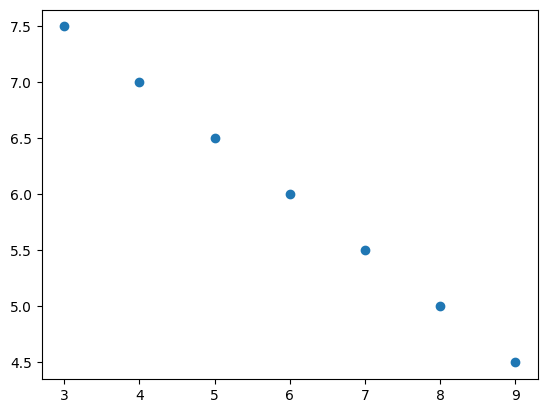

In [28]:
# As a car company we collect this data from previous selling
# define car prices
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# define number of car sell
number_of_car_sell_array = [7.5, 7, 6.5, 6, 5.5, 5, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

# visualize our data
import matplotlib.pyplot as plt
plt.scatter(car_prices_array, number_of_car_sell_array)
plt.show()

In this graph we need to use linear regression to find number of car sell if the car price is 100$

### Steps of Linear Regression
1. create LinearRegression class
2. define model from this LinearRegression class
3. MSE : Mean squared error
4. Optimization (SGD)
5. Backpropagation
6. Prediction

epoch50, loss5.0215582847595215
epoch100, loss3.393277406692505
epoch150, loss2.292980432510376
epoch200, loss1.5494632720947266
epoch250, loss1.0470372438430786
epoch300, loss0.7075275778770447
epoch350, loss0.4781065583229065
epoch400, loss0.3230767548084259
epoch450, loss0.2183164656162262
epoch500, loss0.14752529561519623
epoch550, loss0.09968899190425873
epoch600, loss0.06736438721418381
epoch650, loss0.04552161693572998
epoch700, loss0.030760696157813072
epoch750, loss0.020786335691809654
epoch800, loss0.014046170748770237
epoch850, loss0.009491518139839172
epoch900, loss0.0064138504676520824
epoch950, loss0.004333950113505125
epoch1000, loss0.002928676549345255


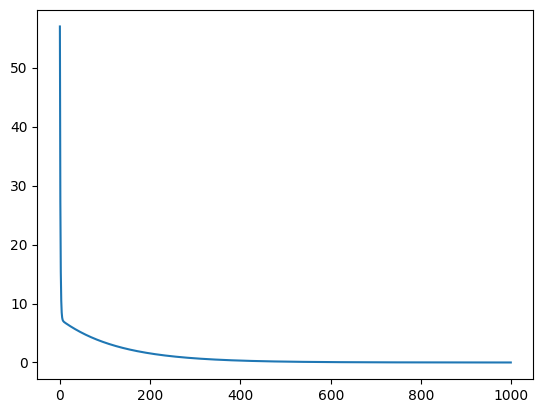

In [31]:
# linear regression with pytorch

# libraries
import torch
from torch.autograd import Variable
import torch.nn as nn
import warnings
warnings.filterwarnings("ignore") # 무시할 수 있는 수준의 warning은 무시한다

# create class
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        # super function / can access everything in nn.Module
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(input_size, output_size) # nn.module의 nn.Linear를 linear로 사용
    
    def forward(self,x):
        return self.linear(x)

# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

# MSE
mse = nn.MSELoss()

# Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# train model
lost_list = []
iter_n = 1001
for iter in range(1,iter_n):
    optimizer.zero_grad() # initialization about model parameter
    results = model(car_price_tensor) # prediction

    loss = mse(results, number_of_car_sell_tensor)
    loss.backward()

    optimizer.step() # parameter update through optimizer
    lost_list.append(loss.data)

    # print loss
    if (iter % 50 == 0):
        print(f'epoch{iter}, loss{loss.data}')


# visualization
plt.plot(range(iter),lost_list)
plt.show()

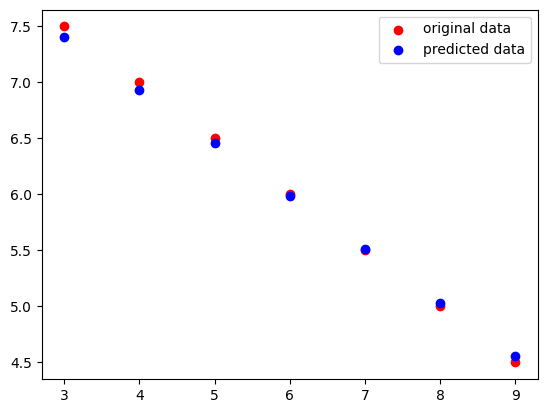

In [32]:
# lets predict car price
pred = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array,number_of_car_sell_array,label = 'original data', color = 'red')
plt.scatter(car_prices_array,pred,label = "predicted data", color='blue')

plt.legend()
plt.show()

### Logistic Regression
- Linear regression is not good at classification -> logistic regression for classification
- Linear regression + logistic funtion(softmax) = loistic regression

### Steps of Logistic Regression
1. Import Libraries
2. Prepare Dataset
    - MNIST dataset
    - 28*28 images, 10 labels
    - To normalize, divide it in 255 pieces
    - use 'train_test_split', 0.8 is used to train data
    - create feature and target tensors
    - batch_size = group size which is trained in at time during the 1 iteration
    - TensorDataset() : Dataset wrapping tensors.
    - DataLoader() : combines dataset and sample. Also, provide multi process iterators over the dataset
    - Visualization
3. Create logistic Regression Model
4. Instantiate Model
    input_dim = 28*28
    output_dim = 10 # labels
    create model
5. Instantiate Loss
    Cross entropy loss
6. Instantiate Optimizer
    SGD Optimizer
7. Training the Model
8. Prediction


In [34]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

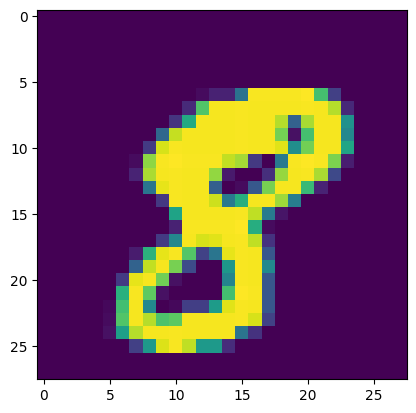

In [36]:
# prepare Dataset

# load data
train = pd.read_csv(r'/Users/jhyuny/Desktop/Euron-5th-Mid-DL/input/train.csv', dtype = np.float32)

# split data into features and labels
targets_np = train.label.values
features_np = train.loc[:,train.columns != 'label'].values/255 # normalization

# train test split
features_train, features_test, targets_train, targets_test = train_test_split(features_np,
                                                                             targets_np,
                                                                             test_size = 0.2,
                                                                             random_state = 42)

# create feature and targets tensor for train set
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor)

# create feature and targets tensor for thest set
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)

batch_size = 100
n_iters = 10000
n_epochs = int(n_iters / (len(features_train)/batch_size))

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain, targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest, targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in dataset
plt.imshow(features_np[10].reshape(28,28))
plt.show()



In [48]:
# Create Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        # Linear part
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.linear(x)
    
""" 아래 클래스를 사용하니 에러 발생 why??
# Create logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init___(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        # Linear part
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out
"""

input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

error = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [49]:
# Trainig the Model
cnt = 0
loss_list = []
iter_list = []
for epoch in range(n_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(-1,28*28))
        labels = Variable(labels)

        optimizer.zero_grad()

        outputs = model(train)

        loss = error(outputs,labels)

        loss.backward()

        optimizer.step()

        cnt+=1

        # pred
        if cnt%50 == 0 :
            correct = 0
            total = 0

            for images, labels in test_loader:
                test = Variable(images.view(-1,28*28))

                outputs = model(test)
                # Get pred from the maximum value
                pred = torch.max(outputs.data, 1)[1]

                total += len(labels)

                correct += (pred == labels).sum()

            acc = 100*correct / float(total)

            # store loss and iteration for visualization
            loss_list.append(loss.data)
            iter_list.append(cnt)
        if cnt%500 == 0:
            print(f'iter: {cnt}, Loss: {loss.data}, Accuracy: {acc}')

iter: 500, Loss: 1.7961130142211914, Accuracy: 68.54762268066406
iter: 1000, Loss: 1.5806798934936523, Accuracy: 74.88095092773438
iter: 1500, Loss: 1.2871811389923096, Accuracy: 77.97618865966797
iter: 2000, Loss: 1.1935938596725464, Accuracy: 79.58333587646484
iter: 2500, Loss: 1.0351557731628418, Accuracy: 80.92857360839844
iter: 3000, Loss: 0.910244882106781, Accuracy: 81.80952453613281
iter: 3500, Loss: 0.9010778069496155, Accuracy: 82.52381134033203
iter: 4000, Loss: 0.7446638345718384, Accuracy: 83.13095092773438
iter: 4500, Loss: 0.9607710242271423, Accuracy: 83.5
iter: 5000, Loss: 0.8098392486572266, Accuracy: 83.94047546386719
iter: 5500, Loss: 0.7481871247291565, Accuracy: 84.28571319580078
iter: 6000, Loss: 0.8701081275939941, Accuracy: 84.57142639160156
iter: 6500, Loss: 0.6669294834136963, Accuracy: 84.69047546386719
iter: 7000, Loss: 0.7125331163406372, Accuracy: 84.95237731933594
iter: 7500, Loss: 0.6300177574157715, Accuracy: 85.16666412353516
iter: 8000, Loss: 0.75550

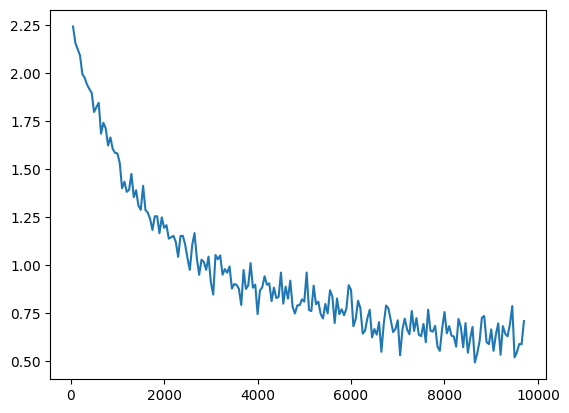

In [50]:
# viz
plt.plot(iter_list, loss_list)
plt.show()

## ANN (Artificial Neural Network)
- if complexity increases(non-linearity), the acc of model decreases
- need to increase complexity of model -> add more non linear functions as hidden layer
- Artificial Neural Network tutorial: https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners

### Steps of ANN:
1. Import Libraries
2. Prepare Dataset
3. Create ANN Model
4. Instantiate Model Class
5. Instantiate Loss
6. Instantiate Optimizer
7. Training the Model
8. Prediction

In [51]:
# Import libraries
import torch
import torch.nn as nn
from torch.autograd import Variable

In [57]:
# create model
class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        # Linear function 1 784 ->150
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity 1
        self.relu1 = nn.ReLU()

        # Linear function 2 150 -> 150
        self.fc2 = nn.Linear(hidden_dim,hidden_dim)
        self.tanh2 = nn.Tanh()

        # Linear function 3 150 -> 150
        self.fc3 = nn.Linear(hidden_dim,hidden_dim)
        self.elu3 = nn.ELU()

        # Linear function 4 150 -> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)

        out = self.fc2(out)
        out = self.tanh2(out)

        out = self.fc3(out)
        out = self.elu3(out)

        out = self.fc4(out)
        return out
    
input_dim = 28*28
hidden_dim = 150
output_dim = 10

# Create ANN
model = ANNModel(input_dim,hidden_dim,output_dim)

# Cross Entrhpy Loss
error = nn.CrossEntropyLoss()

# SGD Optimizer
lr = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [60]:
# ANN model training
cnt = 0
loss_list = []
iter_list = []
acc_list = []
for ep in range(n_epochs):
    for i, (images,labels) in enumerate(train_loader):
        
        train = Variable(images.view(-1,28*28))
        labels = Variable(labels)

        optimizer.zero_grad()

        outputs = model(train)

        loss = error(outputs, labels)

        loss.backward()

        optimizer.step()

        cnt += 1

        if cnt % 50 == 0:
            correct = 0
            total = 0
            
            # test level to calculate acc
            for images, labels in test_loader:

                test = Variable(images.view(-1,28*28))

                outputs = model(test)

                predicted = torch.max(outputs.data, 1)[1]

                total += len(labels)

                correct += (predicted == labels).sum()

            acc = 100 * correct / float(total)

            loss_list.append(loss.data)
            iter_list.append(cnt)
            acc_list.append(acc)

        if cnt % 500 == 0:
            print(f'iter: {cnt}, Loss: {loss.data}, Acc: {acc}')

iter: 500, Loss: 0.06069311499595642, Acc: 96.51190185546875
iter: 1000, Loss: 0.049559883773326874, Acc: 96.57142639160156
iter: 1500, Loss: 0.02384566329419613, Acc: 96.51190185546875
iter: 2000, Loss: 0.049281045794487, Acc: 96.53571319580078
iter: 2500, Loss: 0.07524067163467407, Acc: 96.6547622680664
iter: 3000, Loss: 0.016093630343675613, Acc: 96.71428680419922
iter: 3500, Loss: 0.05343671888113022, Acc: 96.75
iter: 4000, Loss: 0.007097093388438225, Acc: 96.82142639160156
iter: 4500, Loss: 0.04348788782954216, Acc: 96.76190185546875
iter: 5000, Loss: 0.027454689145088196, Acc: 96.78571319580078
iter: 5500, Loss: 0.043104387819767, Acc: 96.6547622680664
iter: 6000, Loss: 0.028569824993610382, Acc: 96.71428680419922
iter: 6500, Loss: 0.03940757364034653, Acc: 96.79762268066406
iter: 7000, Loss: 0.024704432114958763, Acc: 96.86904907226562
iter: 7500, Loss: 0.03370608016848564, Acc: 96.8452377319336
iter: 8000, Loss: 0.1652863323688507, Acc: 96.76190185546875
iter: 8500, Loss: 0.009

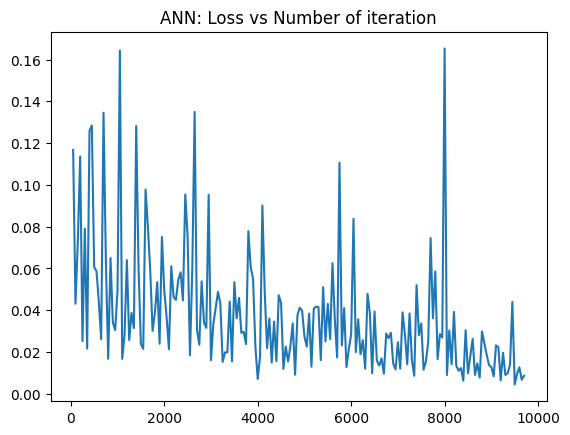

<function matplotlib.pyplot.show(close=None, block=None)>

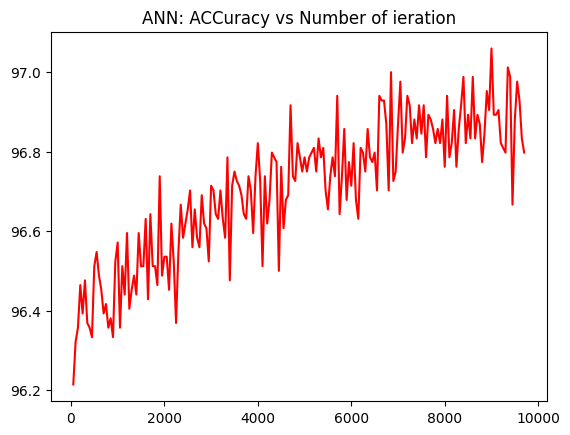

In [61]:
# viz
plt.plot(iter_list,loss_list)
plt.title("ANN: Loss vs Number of iteration")
plt.show()

plt.plot(iter_list, acc_list, color='red')
plt.title("ANN: ACCuracy vs Number of ieration")
plt.show

## CNN(Convolutional Neural Network)
- CNN is well adapted to classify images
- You can learn CNN basics: https://www.kaggle.com/kanncaa1/convolutional-neural-network-cnn-tutorial

### Steps of CNN
1. Import Libraries
2. Prepare Dataset
3. Convolutional layer
    - create feature maps with kernels(filters)
    - padding : after conv layer, can apply padding to increase dimension to preserve as much as information about the original image
    - use 2 Conv layer
    - number of feature map is out_channels = 16
    - Filter size is 5*5
4. Pooling layer
    - pooling size is 2*2
5. Flatterning
6. Fully Connected Layer
    - Use softmax function, not use activation function in fully connected layer. only combine convolutonal part and logistic regression to create CNN model
7. Instantiate Model Class
8. Instantiate Loss
9. Instantiate Optimizer
10. Training the Model
11. Prediction

CNN show more better than accuracy of ANN

In [62]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [64]:
# Create CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # conv1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        # Max pool1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        # Conv2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        # Max pool2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        # Fuuly connected 1
        self.fc1 = nn.Linear(32*4*4, 10)

    def forward(self, x):
        out = self.cnn1(x)
        out = self.relu1(out)

        out = self.maxpool1(out)

        out = self.cnn2(out)
        out = self.relu2(out)

        out = self.maxpool2(out)

        out = out.view(out.size(0), -1)

        out = self.fc1(out)

        return out

batch_size = 100
n_iters = 2500
n_epochs = int(n_iters / (len(features_train) / batch_size))

train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

model = CNNModel()

error = nn.CrossEntropyLoss()

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [65]:
# CNN model training
cnt = 0
loss_list = []
iter_list = []
acc_list = []
for ep in range(n_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)

        optimizer.zero_grad()

        outputs = model(train)

        loss = error(outputs, labels)

        loss.backward() # calculating gradients

        optimizer.step() # update parameters

        cnt+=1

        if cnt % 50 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:
                test = Variable(images.view(100,1,28,28))

                outputs = model(test)

                predicted = torch.max(outputs.data, 1)[1]

                total += len(labels)

                correct += (predicted == labels).sum()
            acc = 100 *  correct / float(total)

            loss_list.append(loss.data)
            iter_list.append(cnt)
            acc_list.append(acc)
        if cnt % 500 == 0:
            print(f'iter: {cnt}, Loss: {loss.data}, Acc: {acc}')

iter: 500, Loss: 0.10698822140693665, Acc: 96.69047546386719
iter: 1000, Loss: 0.04221823811531067, Acc: 97.70237731933594
iter: 1500, Loss: 0.03529562056064606, Acc: 98.04762268066406
iter: 2000, Loss: 0.015508899465203285, Acc: 98.28571319580078


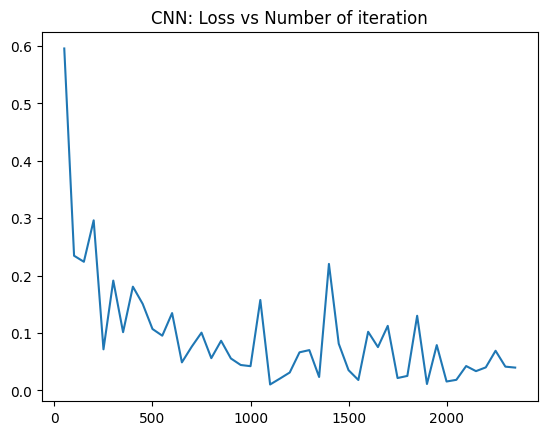

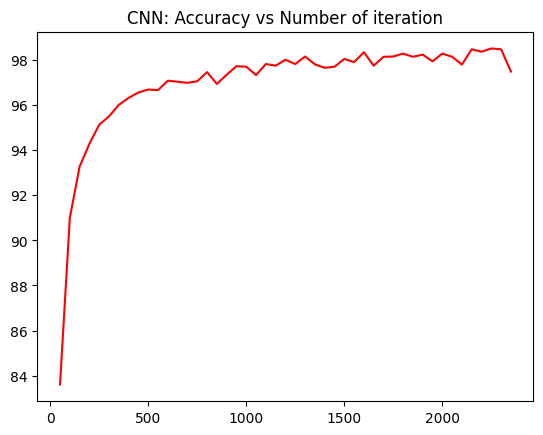

In [66]:
plt.plot(iter_list,loss_list)
plt.title("CNN: Loss vs Number of iteration")
plt.show()

plt.plot(iter_list, acc_list, color='red')
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()